In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as p

In [23]:
### Loading the Data 

Z = p.load(open('data/R8_8pc_metal.0100.scal0.p'))

In [24]:
### Setting up bounds for X and Y along the grid

Zxy_data = Z['z']["data"]
Zxy_bounds = Z['z']["bounds"]
Nx,Ny = Zxy_data.shape

In [50]:
### Defining the length and width of the plot

Lx = 100
Ly = 100

In [51]:
### Defining the center of the plot

Xmin = -Lx/2
Ymin = -Ly/2

In [52]:
### Creating a range for the indices

i_index = np.arange(Nx)
j_index = np.arange(Ny)

In [53]:
### Finding the difference between each "Zone"

dx = Nx/Lx
dy = Ny/Ly

In [54]:
### Creating indices for X and Y

Xi = i_index * dx + Xmin + dx/2
Yj = j_index * dy + Ymin + dy/2

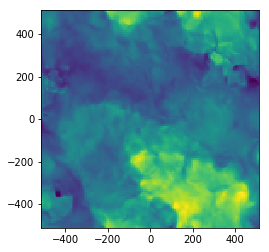

In [55]:
### Plotting the metal injection plot

plt.imshow(Zxy_data, extent=Zxy_bounds, origin='lower')

In [56]:
### Setting the max angle and max radius

Nr = 20
Nangle = 10
rMax = Nx/2
angleMax = 2 * np.pi

In [57]:
### Create an array to span the radii values

dr = rMax / Nr
rindex = np.arange(Nr)
r = rindex * dr 

In [58]:
### Creating the Angle array and angle difference

dangle = angleMax/Nangle
angleindex = np.arange(Nangle)
angle = angleindex * dangle

In [59]:
### Creating an array to store the Two-point correlation function data

TwoPoint = []
Zmean=Zxy_data.mean()
Zvar=Zxy_data.var()
for rad in r:
    for ang in angle:
        dxi = (rad * np.cos(ang))
        dyj = (rad * np.sin(ang))
        di = dxi / dx
        dj = dyj / dy
        sum = 0
        for i in i_index:
            for j in j_index:
                i2=(i+int(round(di)))%Nx
                j2=(j+int(round(dj)))%Ny
                sum += Zxy_data[i,j] * Zxy_data[i2,j2]
        TwoPoint.append(sum/(Nx * Ny))

In [60]:
### Changing the TwoPoint list to an array

tp_2d=(np.array(TwoPoint).reshape(Nr,Nangle)-Zmean**2)/Zvar

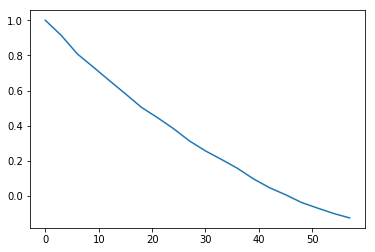

In [61]:
### Creating the plot

plt.plot(r,tp_2d.mean(axis=1))